In [1]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

2025-02-14 10:34:07.897312: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

In [47]:
# Cargar el dataset
df = pd.read_csv("/Users/lucasherranzvicente/Bootcamp_DS/repositorios/ML_music_genres/data/train_with_features.csv")

# Reagrupar géneros y eliminar los no deseados
genre_mapping = {
    "Jazz": "Jazz / Blues / Folk / Soul", "Blues": "Jazz / Blues / Folk / Soul", "Soul-RnB": "Jazz / Blues / Folk / Soul",
    "Spoken": None, "Easy Listening": None,
    "Classical": "Classical & Historic", "Old-Time / Historic": "Classical & Historic", "Pop": None, "Ambient Electronic": "Electronic",
    "Electronic":"Electronic", "Chiptune / Glitch":"Electronic", "International": None, "Country":None, "Experimental":None, "Instrumental": None,
    "Rock":"Rock & Punk", "Punk": "Rock & Punk", "Folk": "Jazz / Blues / Folk / Soul", "Hip-Hop": None
}
df['genre'] = df['genre'].replace(genre_mapping)
df = df.dropna(subset=['genre'])

In [48]:
df = df[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20', 'genre']]  # 20 MFCCs
df_train = df[:round(len(df)*0.8)]
df_test =df[round(len(df)*0.8):]

In [49]:
X = df_train.drop(columns="genre")
y = df_train["genre"]

In [50]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [57]:
capas = [
    keras.layers.Flatten(),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 50, activation='relu'),
    keras.layers.Dense(units = 4, activation='softmax')
]

model = keras.models.Sequential(capas)

model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="sgd")

In [58]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="sgd")

In [59]:
callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)]

In [60]:
X_train = np.array(X_train, dtype=np.float32)
X_valid = np.array(X_valid, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_valid = np.array(y_valid, dtype=np.int32)

In [61]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 200,
    validation_data = (X_valid, y_valid),
    callbacks=callbacks
)

Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2664 - loss: 1.3899 - val_accuracy: 0.5814 - val_loss: 1.2139
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5690 - loss: 1.1848 - val_accuracy: 0.6566 - val_loss: 1.0333
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6336 - loss: 1.0238 - val_accuracy: 0.6773 - val_loss: 0.9106
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6575 - loss: 0.9146 - val_accuracy: 0.7010 - val_loss: 0.8264
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6885 - loss: 0.8415 - val_accuracy: 0.7172 - val_loss: 0.7702
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7080 - loss: 0.7766 - val_accuracy: 0.7258 - val_loss: 0.7362
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7098 - loss: 0.7622 - val_accuracy: 0.7322 - val_loss: 0.7129
Epoch 8/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7206 - loss: 0.7379 - val_accuracy: 0.7367 - 

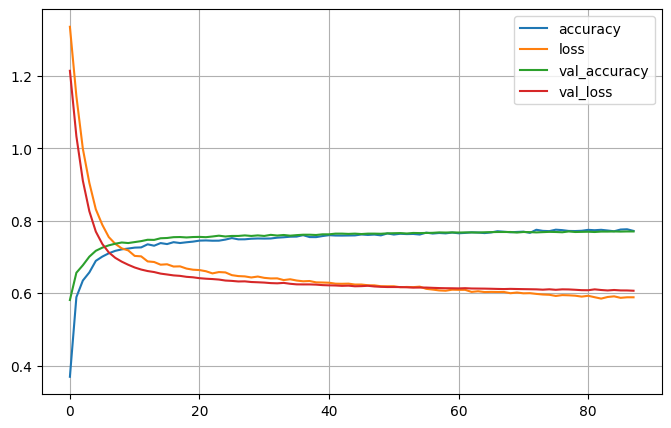

In [62]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [63]:
X_test = df_test.drop(columns="genre")
y_test = df_test["genre"]

In [64]:
y_test = label_encoder.transform(y_test)

In [65]:
X_test = scaler.transform(X_test)

In [66]:
model.evaluate(X_test, y_test)

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7429 - loss: 0.6605


[0.6683517098426819, 0.7435125708580017]

In [67]:
pred = model.predict(X_test)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [68]:
np.argmax(pred, axis= 1)

array([1, 1, 0, ..., 1, 3, 1])

In [69]:
# Evaluar el modelo
print(classification_report(y_test, np.argmax(pred, axis= 1)))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       189
           1       0.76      0.78      0.77      1028
           2       0.59      0.45      0.51       365
           3       0.76      0.80      0.78      1077

    accuracy                           0.74      2659
   macro avg       0.72      0.70      0.71      2659
weighted avg       0.74      0.74      0.74      2659



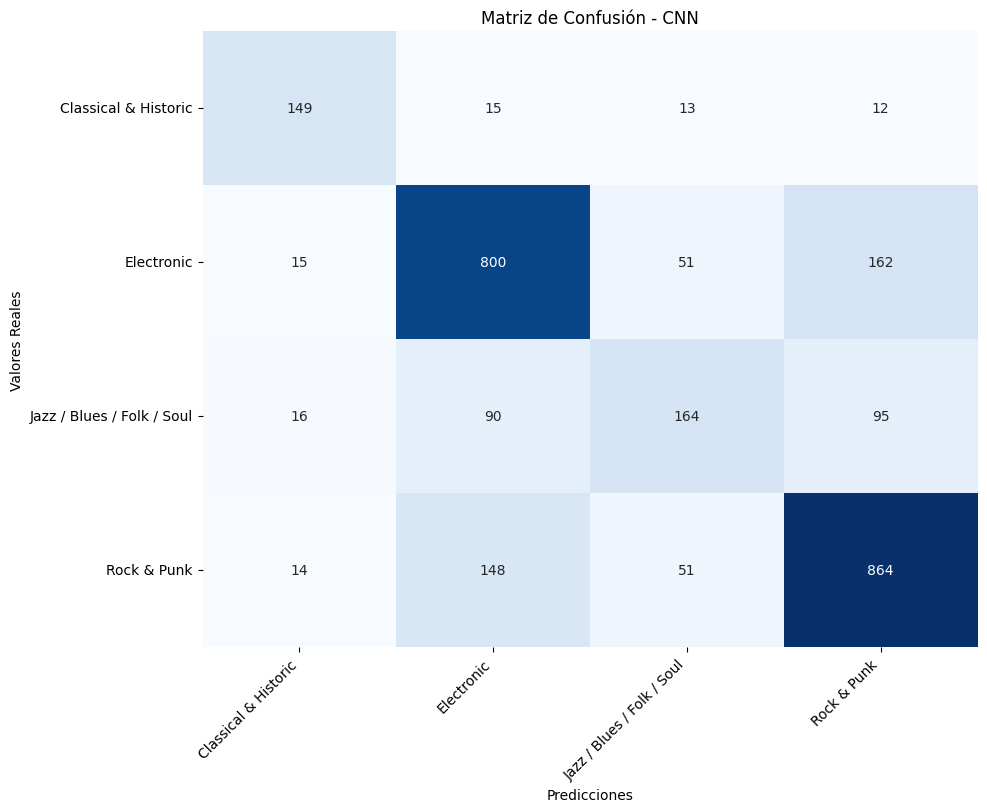

In [70]:
# Matriz de confusión
cm = confusion_matrix(y_test, np.argmax(pred, axis= 1))

# Obtener los nombres de los géneros desde el LabelEncoder
genre_labels = label_encoder.classes_

# Graficar matriz de confusión con nombres de géneros
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=genre_labels, yticklabels=genre_labels)

# Personalizar el gráfico
plt.title("Matriz de Confusión - CNN")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()
